In [1]:
import kauri as kr

# Non-Planar Rooted Trees

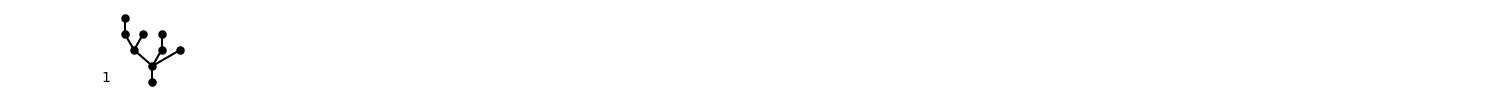

In [2]:
t = kr.Tree([[[[]], [],[[[]],[]]]])
kr.display(t.sorted(), fig_size = (15,1.1))

## Sorted representation

Since our trees are non-planar, different orderings of the same tree are treated as equal. The Tree.sorted() method gives the ordering of the tree with the heaviest branches on the right

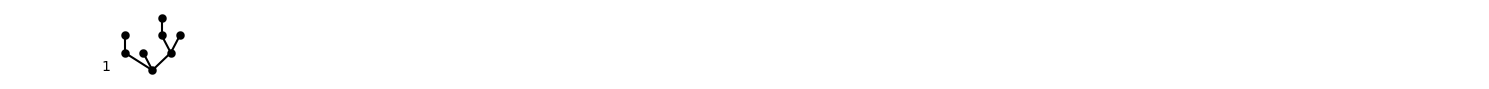

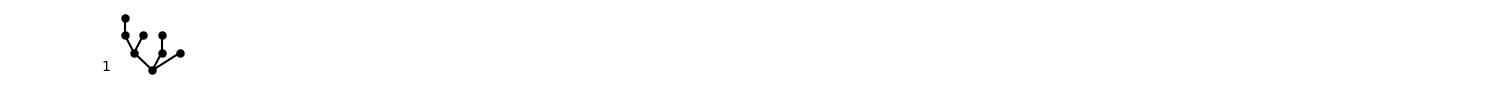

t == t.sorted():  True


In [3]:
t = kr.Tree([[[]], [],[[[]],[]]])
kr.display(t)
kr.display(t.sorted())
print("t == t.sorted(): ", t == t.sorted())

## Arithmetic

Rather than using the classes kr.Forest and kr.ForestSum directly, it is usually easier to create these objects via arithmetic operations on trees.

In [4]:
t1 = kr.Tree([[],[]])
t2 = kr.Tree([[],[],[[]]])
t3 = kr.Tree([[]])

 1 * [[], []] -2 * [[], [], [[]]] [[]] [[]]


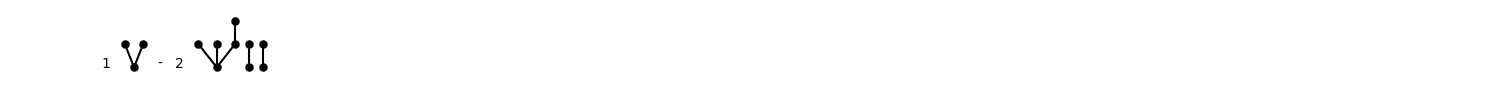

In [5]:
# Tedious to construct and read
f = kr.Forest( [t2, t3, t3] )
t4 = kr.ForestSum([ (1, t1), (-2, f) ])
print(t4)
kr.display(t4)

 1 * [[], []] -2 * [[], [], [[]]] [[]] [[]]


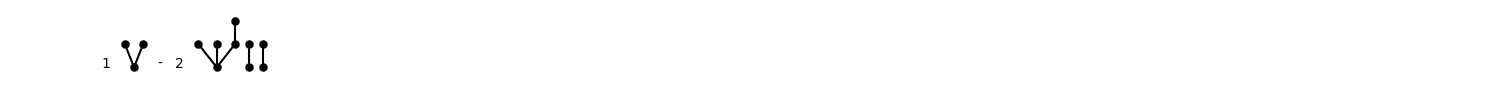

In [6]:
# Much better
t4 = t1 - 2 * t2 * t3 ** 2
print(t4)
kr.display(t4)

## Singleton-reduced representation

When the number of nodes is constant in a sum (e.g. in the antipode of a tree), it is useful to ignore redundant occurances of the single-node tree, Tree([]). When evaluating the elementary weights function of a consistent Runge--Kutta scheme, Tree([]) evaluates to 1, and so applying the elementary weights to a singleton-reduced form gives the same result.

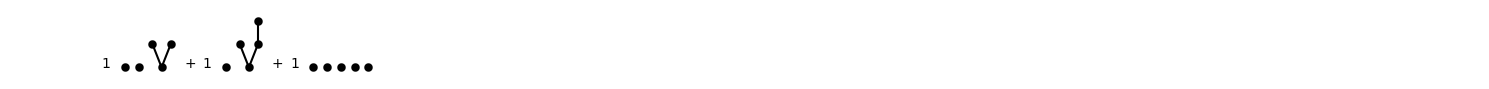

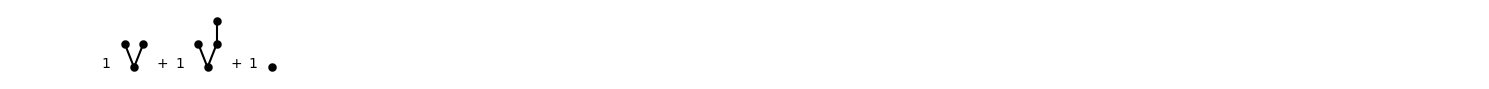

In [7]:
t1 = kr.Tree([])
t2 = kr.Tree([[],[]])
t3 = kr.Tree([[],[[]]])
f = t1 * t1 * t2 + t1 * t3 + t1 * t1 * t1 * t1 * t1
kr.display(f)
kr.display(f.singleton_reduced())

## Factorial

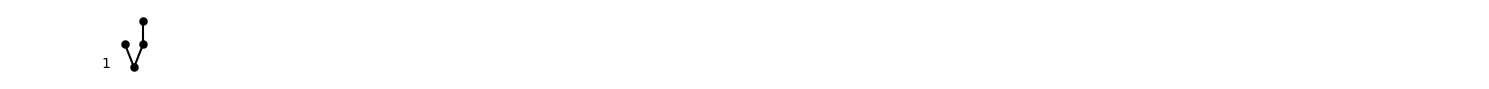

Tree Factorial:  8


In [8]:
t1 = kr.Tree([[],[[]]])
kr.display(t1)
print("Tree Factorial: ", t1.factorial())

# The Butcher-Connes-Kreimer (BCK) Hopf Algebra

In [9]:
import kauri.bck as bck

The ``kauri.bck`` sub-package implements the Butcher-Connes-Kreimer (BCK) Hopf algebra $(H, \Delta_{BCK}, \mu, \varepsilon_{BCK}, \emptyset, S_{BCK})$, defined as follows.

- $H$ is the set of all non-planar rooted trees.
- The unit $\emptyset$ is the empty forest.
- The counit map is defined by $\varepsilon_{BCK}(\emptyset) = 1$, $\varepsilon_{BCK}(t) = 0$ for all $\emptyset \neq t \in H$.
- Multiplication $\mu : H \otimes H \to H$ is defined as the
  commutative juxtaposition of two forests.
- Comultiplication $\Delta : H \to H \otimes H$ is defined as

$$\Delta_{BCK}(t) = t \otimes \emptyset + \emptyset \otimes t + \sum_{s \subset t} [t \setminus s] \otimes s$$

  where the sum runs over all proper rooted subtrees $s$ of $t$, and $[t \\setminus s]$ is the forest of all trees remaining after erasing $s$ from $t$.
- The antipode $S_{BCK}$ is defined by $S_{BCK}(\bullet) = -\bullet$ and

$$S_{BCK}(t) = -t - \sum_{s \subset t} (-1)^{n(t \setminus s)} S_{BCK}([t \setminus s]) s$$

  where $n(t \setminus s)$ is the number of trees in the forest $[t \setminus s]$.

## Coproduct

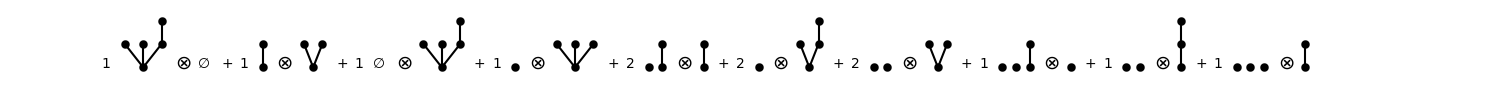

In [10]:
t1 = kr.Tree([[],[],[[]]])
cp = bck.coproduct(t1)
kr.display(cp)

## Antipode

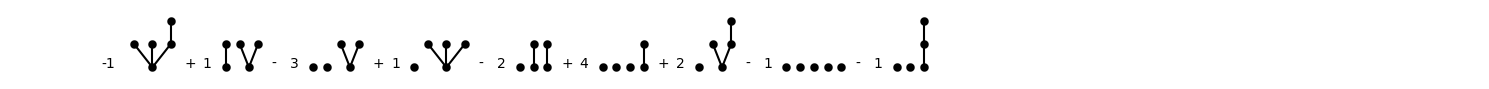

In [11]:
t1 = kr.Tree([[],[],[[]]])
t2 = bck.antipode(t1)
kr.display(t2)

## Testing identities of the Butcher-Connes-Kreimer Hopf algebra

### Antipode Property: $\quad \mu \circ (S \otimes \mathrm{Id}) \circ \Delta = \varepsilon$

In [12]:
result = True

for t in kr.trees_up_to_order(4):
    if bck.counit(t) != (bck.antipode * kr.ident)(t):
        result = False
        break

print(result)

True


### $S \circ S = \mathrm{Id}$

In [13]:
result = True

for t in kr.trees_up_to_order(4):
    if (bck.antipode & bck.antipode)(t) != t:
        result = False
        break

print(result)

True


### $(\mathrm{Id} - S \circ S)^{|\tau|}(\tau) = 0, \quad \forall |\tau| \geq 1$

In [14]:
result = True

g = kr.ident - bck.antipode & bck.antipode
f = kr.Map(lambda x : (g**x.nodes())(x))

for t in kr.trees_up_to_order(4):
    if t == kr.Tree(None):
        continue
    if f(t) != 0:
        result = False
        break

print(result)

False


### $(\mathrm{Id} + S) \circ (\mathrm{Id} - S\circ S)^{|\tau| - 1}(\tau) = 0, \quad \forall |\tau| \geq 1$

In [15]:
result = True

f1 = kr.ident + bck.antipode
f2 = kr.ident - bck.antipode & bck.antipode

f3 = kr.Map(lambda x : (f2 ** (x.nodes() - 1))(x) )

f = f1 & f3

for t in kr.trees_up_to_order(4):
    if t == kr.Tree(None):
        continue
    if f(t) != 0:
        result = False
        break

print(result)

False


### $a^2(\tau) / 2^{|\tau|} = a(\tau), \quad a(\tau) = 1/\tau!$

In [16]:
from math import isclose

In [17]:
a = kr.Map(lambda x : 1 / x.factorial())

In [18]:
result = True

for t in kr.trees_up_to_order(4):
    if not isclose((a**2)(t) / 2**t.nodes(), a(t), abs_tol = 1e-10):
        result = False
        break
    
print(result)

True


### $a^{-1}(\tau) = (-1)^{|\tau|} a(\tau), \quad a(\tau) = 1/\tau!$

In [19]:
result = True

for t in kr.trees_up_to_order(4):
    if not isclose(a(t), (-1)**t.nodes() * (a** (-1))(t), abs_tol = 1e-10):
        result = False
        break

print(result)

True


# Iterators and Generators

## Iterating over trees

In [20]:
t = kr.Tree(None)
while t.nodes() <= 3:
    print(t)
    t = next(t)

∅
[]
[[]]
[[[]]]
[[], []]


In [21]:
for t in kr.trees_up_to_order(3):
    print(t)

∅
[]
[[]]
[[[]]]
[[], []]


In [22]:
for t in kr.trees_of_order(3):
    print(t)

[[[]]]
[[], []]


## Iterating over trees in a forest or terms in a forest sum

In [23]:
f = kr.Tree([]) ** 2 * kr.Tree([[],[]])

for t in f:
    print(t)

[]
[]
[[], []]


In [24]:
s = bck.antipode(kr.Tree([[],[]]))
print(s, "\n")

for c, f in s:
    print(c, f)

 -1 * [[], []] + 2 * [] [[]] -1 * [] [] [] 

-1 [[], []]
2 [] [[]]
-1 [] [] []


# The Calaque, Ebrahimi-Fard and Manchon (CEM) Hopf Algebra

In [25]:
import kauri.cem as cem

The ``kauri.cem`` sub-package implements the Calaque, Ebrahimi-Fard and Manchon (CEM) Hopf algebra $(\widetilde{H}, \Delta_{CEM}, \mu, \varepsilon_{CEM}, \bullet, S_{CEM})$, defined as follows.

- $\widetilde{H}$ is the space of non-empty trees, defined as $\widetilde{H} = H / J$ where $J$ is the ideal generated by $\bullet - \emptyset$.
- The unit is the single-node tree, $\bullet$.
- The counit map is defined by $\varepsilon_{CEM}(\bullet) = 1$, $\varepsilon_{CEM}(t) = 0$ for all $\bullet \neq t \in \widetilde{H}$.
- Multiplication $\mu : \widetilde{H} \otimes \widetilde{H} \to \widetilde{H}$ is defined as the commutative juxtaposition of two forests.
- Comultiplication $\Delta : \widetilde{H} \to \widetilde{H} \otimes \widetilde{H}$ is defined as

$$\Delta_{CEM}(t) = \sum_{s \subset t} s \otimes t / s$$

  where the sum runs over all possible subforests $s$ of $t$, and $t / s$ is the tree obtained by contracting each connected component of
  $s$ onto a vertex.
- The antipode $S_{CEM}$ is defined by $S_{CEM}(\bullet) = \bullet$ and

$$S_{CEM}(t) = -t - \sum_{t, \bullet \neq s \subset t} S_{CEM}(s) \, t / s$$


# Labelled Trees

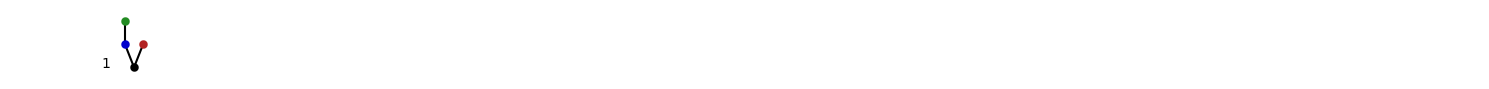

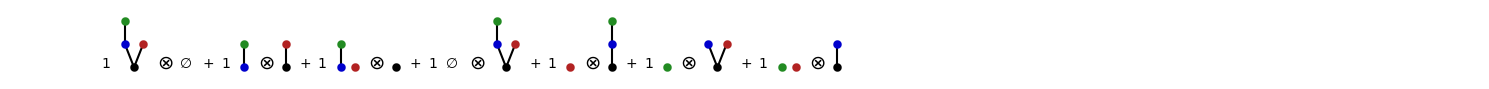

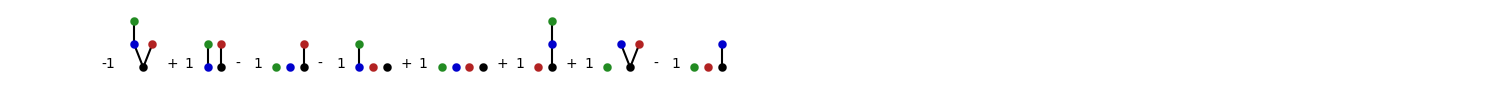

In [26]:
t = kr.Tree([[[3],2],[1],0])
kr.display(t)
kr.display(bck.coproduct(t))
kr.display(bck.antipode(t))

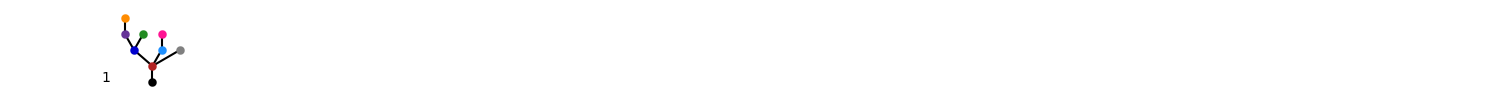

In [27]:
t = kr.Tree([[[[8],7], [6],[[[5],4],[3],2],1],0])
kr.display(t.sorted(), fig_size = (15,1.1))